In [468]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [469]:
Tax_Assessment_data=pd.read_csv("/content/Cleaned_house_data.csv")

In [470]:
Tax_Assessment_data.head()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.0,0.0,6.0,0.0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.0,0.0,5.0,0.0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3.0,3512.0,0.0,5.0,0.0
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019.0,4.0,4.0,0.0
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.0,3.0,5.0,55.0


In [471]:
Tax_Assessment_data.describe()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,HOA
count,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,4975.000000,5000.000000
mean,2.127070e+07,7.746262e+05,85723.025600,-110.912107,32.308512,4.653974,9.402828e+03,1992.32800,3.933800,3.830100,3714.077920,2.812200,1.885226,73.209218
std,2.398508e+06,3.185556e+05,38.061712,0.120629,0.178028,51.633769,1.729385e+05,65.48614,1.245362,1.386243,1114.596305,1.196753,1.136578,90.815459
min,3.042851e+06,1.690000e+05,85118.000000,-112.520168,31.356362,0.000000,0.000000e+00,0.00000,1.000000,1.000000,1100.000000,0.000000,0.000000,0.000000
25%,2.140718e+07,5.850000e+05,85718.000000,-110.979260,32.277484,0.580000,4.803605e+03,1987.00000,3.000000,3.000000,3051.000000,2.000000,1.000000,0.000000
50%,2.161469e+07,6.750000e+05,85737.000000,-110.923420,32.318517,0.990000,6.223760e+03,1999.00000,4.000000,4.000000,3512.000000,3.000000,2.000000,44.000000
75%,2.180480e+07,8.350000e+05,85749.000000,-110.859078,32.394334,1.750000,8.082830e+03,2006.00000,4.000000,4.000000,4120.000000,3.000000,3.000000,122.000000
max,2.192856e+07,5.300000e+06,86323.000000,-109.454637,34.927884,2154.000000,1.221508e+07,2019.00000,36.000000,36.000000,22408.000000,30.000000,9.000000,925.000000


In [472]:
Tax_Assessment_data.columns


Index(['MLS', 'sold_price', 'zipcode', 'longitude', 'latitude', 'lot_acres',
       'taxes', 'year_built', 'bedrooms', 'bathrooms', 'sqrt_ft', 'garage',
       'fireplaces', 'HOA'],
      dtype='object')

In [473]:
Tax_Assessment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MLS         5000 non-null   int64  
 1   sold_price  5000 non-null   float64
 2   zipcode     5000 non-null   int64  
 3   longitude   5000 non-null   float64
 4   latitude    5000 non-null   float64
 5   lot_acres   5000 non-null   float64
 6   taxes       5000 non-null   float64
 7   year_built  5000 non-null   int64  
 8   bedrooms    5000 non-null   int64  
 9   bathrooms   5000 non-null   float64
 10  sqrt_ft     5000 non-null   float64
 11  garage      5000 non-null   float64
 12  fireplaces  4975 non-null   float64
 13  HOA         5000 non-null   float64
dtypes: float64(10), int64(4)
memory usage: 547.0 KB


In [474]:
correlation = Tax_Assessment_data.corr()['taxes']

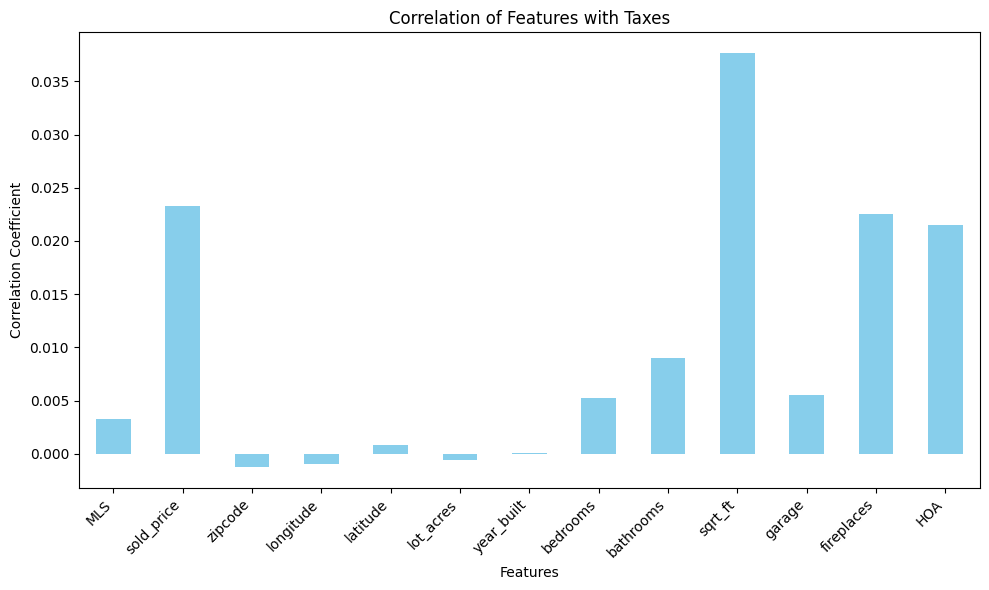

In [475]:
correlation = correlation.drop('taxes')

plt.figure(figsize=(10, 6))
correlation.plot(kind='bar', color='skyblue')
plt.title('Correlation of Features with Taxes')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [476]:
Tax_Assessment_data['fireplaces'].fillna(0, inplace=True)
Tax_Assessment_data['fireplaces'].mean()

1.8758

In [477]:
Tax_Assessment_data['taxprice_per_sqft']=Tax_Assessment_data['taxes']/Tax_Assessment_data['sqrt_ft']

In [478]:
Tax_Assessment_data['taxprice_per_sqft'].describe()

,taxprice_per_sqft
count,5000.000000
mean,2.290521
std,30.245147
min,0.000000
25%,1.448863
50%,1.790238
75%,2.166593
max,2132.147844


In [479]:
Tax_Assessment_data = Tax_Assessment_data[Tax_Assessment_data['taxprice_per_sqft'] <= 15]

In [480]:
Tax_Assessment_data.query('taxprice_per_sqft > 15')

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,HOA,taxprice_per_sqft


In [481]:
data = Tax_Assessment_data['taxprice_per_sqft']
quantiles = 6
labels = ["1", "2", "3","4","5","6"]

categorized_data = pd.qcut(data, quantiles, labels=labels)

df = pd.DataFrame({'Data': Tax_Assessment_data['taxprice_per_sqft'], 'Tax_Category': categorized_data})

print(df['Tax_Category'])

0       1
1       2
2       6
3       1
4       6
       ..
4995    1
4996    5
4997    1
4998    2
4999    1
Name: Tax_Category, Length: 4997, dtype: category
Categories (6, object): ['1' < '2' < '3' < '4' < '5' < '6']


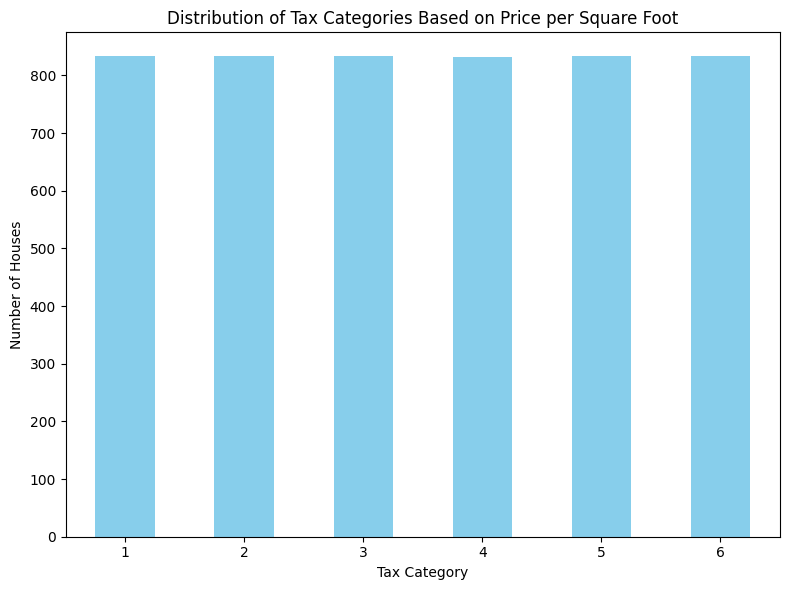

In [482]:
plt.figure(figsize=(8, 6))
df['Tax_Category'].value_counts(sort=False).plot(kind='bar', color='skyblue')
plt.title('Distribution of Tax Categories Based on Price per Square Foot')
plt.xlabel('Tax Category')
plt.ylabel('Number of Houses')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [483]:
Tax_Assessment_data['Tax_category']=df['Tax_Category']

In [484]:
Tax_Assessment_data

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,HOA,taxprice_per_sqft,Tax_category
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.0,0.0,6.0,0.0,0.502095,1
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.0,0.0,5.0,0.0,1.427721,2
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3.0,3512.0,0.0,5.0,0.0,2.984624,6
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019.0,4.0,4.0,0.0,0.933427,1
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.0,3.0,5.0,55.0,2.406660,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,21810382,495000.0,85641,-110.661829,31.907917,4.98,2017.00,2005,5,3.0,3601.0,3.0,1.0,0.0,0.560122,1
4996,21908591,550000.0,85750,-110.858556,32.316373,1.42,4822.01,1990,4,3.0,2318.0,3.0,1.0,43.0,2.080246,5
4997,21832452,475000.0,85192,-110.755428,32.964708,12.06,1000.00,1969,3,2.0,1772.0,0.0,0.0,0.0,0.564334,1
4998,21900515,550000.0,85745,-111.055528,32.296871,1.01,5822.93,2009,4,4.0,3724.0,3.0,1.0,0.0,1.563622,2


In [485]:
Tax_Assessment_data

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,HOA,taxprice_per_sqft,Tax_category
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.0,0.0,6.0,0.0,0.502095,1
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.0,0.0,5.0,0.0,1.427721,2
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3.0,3512.0,0.0,5.0,0.0,2.984624,6
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019.0,4.0,4.0,0.0,0.933427,1
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.0,3.0,5.0,55.0,2.406660,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,21810382,495000.0,85641,-110.661829,31.907917,4.98,2017.00,2005,5,3.0,3601.0,3.0,1.0,0.0,0.560122,1
4996,21908591,550000.0,85750,-110.858556,32.316373,1.42,4822.01,1990,4,3.0,2318.0,3.0,1.0,43.0,2.080246,5
4997,21832452,475000.0,85192,-110.755428,32.964708,12.06,1000.00,1969,3,2.0,1772.0,0.0,0.0,0.0,0.564334,1
4998,21900515,550000.0,85745,-111.055528,32.296871,1.01,5822.93,2009,4,4.0,3724.0,3.0,1.0,0.0,1.563622,2


In [486]:
filtered_data = Tax_Assessment_data[Tax_Assessment_data['Tax_category'] == "3"]
print(filtered_data)

           MLS  sold_price  zipcode   longitude   latitude  lot_acres  \
6     21610478   2400000.0    85712 -110.883315  32.261069       2.10   
61    21816349   2000000.0    85715 -110.862142  32.264695     103.00   
81    21222026   1890000.0    85715 -110.859528  32.262883       1.17   
107   21417996   1700000.0    85755 -110.995365  32.473032       1.77   
125   21303975   1600000.0    85718 -110.917606  32.296197       3.50   
...        ...         ...      ...         ...        ...        ...   
4981  21832935    548868.0    85718 -110.884230  32.310577       0.97   
4983  21902362    525000.0    85749 -110.781531  32.289059       0.72   
4987  21905416    550000.0    85658 -111.051284  32.412534       0.20   
4989  21902512    545000.0    85745 -111.061493  32.306472       1.19   
4993  21908358    565000.0    85750 -110.820216  32.307646       0.83   

         taxes  year_built  bedrooms  bathrooms  sqrt_ft  garage  fireplaces  \
6     19038.42        2001         9       

In [487]:
import numpy as np
from scipy import stats

class KNNClassifier:
    def fit(self, X, y):
        self.X = X
        self.y = y

    def predict(self, X, K=5, epsilon=1e-3):
        N = X.shape[0]
        y_hat = np.zeros(N)
        for i in range(N):
            dist2 = np.sum((self.X - X.iloc[i])**2, axis=1)
            idxt = np.argsort(dist2)[:K]
            mode_result = stats.mode(np.array(self.y.iloc[idxt], dtype=np.int64))
            y_hat[i] = mode_result.mode if isinstance(mode_result.mode, np.ndarray) else mode_result.mode
        return y_hat

In [488]:
X = Tax_Assessment_data[['longitude','latitude','sqrt_ft']]
y = Tax_Assessment_data['Tax_category']

In [489]:
train_ratio = 0.8
train_size = int(len(Tax_Assessment_data) * train_ratio)

X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 3997
Testing set size: 1000


In [490]:
knn=KNNClassifier()
knn.fit(X_train,y_train)
y_pred= knn.predict(X_train)

In [491]:
y_pred.astype(int)

array([1, 5, 2, ..., 1, 3, 1])

In [492]:
y_pred_test=knn.predict(X_test,K=5)

In [493]:
y_pred_test

array([1., 2., 4., 3., 3., 4., 2., 1., 3., 1., 6., 1., 5., 1., 5., 6., 2.,
       6., 1., 1., 1., 3., 2., 4., 6., 1., 4., 2., 1., 1., 1., 2., 3., 1.,
       3., 4., 2., 4., 1., 3., 6., 5., 6., 6., 2., 2., 3., 6., 1., 2., 6.,
       1., 5., 6., 6., 5., 4., 4., 3., 1., 5., 4., 2., 2., 6., 5., 2., 2.,
       4., 5., 6., 2., 4., 2., 2., 6., 1., 1., 2., 1., 5., 2., 1., 3., 2.,
       2., 6., 4., 6., 4., 3., 4., 1., 1., 6., 4., 3., 1., 1., 1., 1., 2.,
       1., 5., 1., 3., 3., 6., 4., 2., 2., 5., 4., 3., 6., 6., 6., 3., 4.,
       5., 5., 4., 3., 4., 1., 6., 3., 1., 6., 5., 6., 5., 1., 2., 4., 2.,
       3., 6., 6., 1., 2., 4., 3., 2., 1., 5., 1., 2., 1., 6., 5., 1., 1.,
       4., 5., 1., 1., 5., 2., 6., 4., 5., 5., 2., 5., 1., 5., 4., 5., 5.,
       3., 1., 3., 1., 3., 5., 5., 6., 2., 5., 1., 2., 2., 3., 5., 4., 6.,
       6., 5., 3., 1., 1., 6., 1., 1., 2., 6., 3., 2., 5., 2., 3., 6., 2.,
       2., 3., 1., 4., 5., 4., 1., 6., 2., 6., 1., 6., 4., 1., 1., 2., 6.,
       1., 6., 5., 2., 4.

In [494]:
import numpy as np

def predict_price_category(longitude, latitude, taxprice_per_sqft, X_train, y_train, K=5, epsilon=1e-3):

  x_test = np.array([longitude, latitude, taxprice_per_sqft])
  dist2 = np.sum((X_train - x_test)**2, axis=1)
  idxt = np.argsort(dist2)[:K]
  gamma_k = 1/(np.sqrt(dist2[idxt])+epsilon)
  y_hat = np.bincount(y_train.iloc[idxt], weights=gamma_k).argmax()
  return y_hat
longitude= -110.3782
latitude= 31.356362
taxprice_per_sqft= 0.123
predict_price_category(longitude, latitude,taxprice_per_sqft , X_train, y_train, K=5, epsilon=1e-3)

1

<ipython-input-495-15a143abd1db>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Tax_category', data=Tax_Assessment_data, palette='Set2')


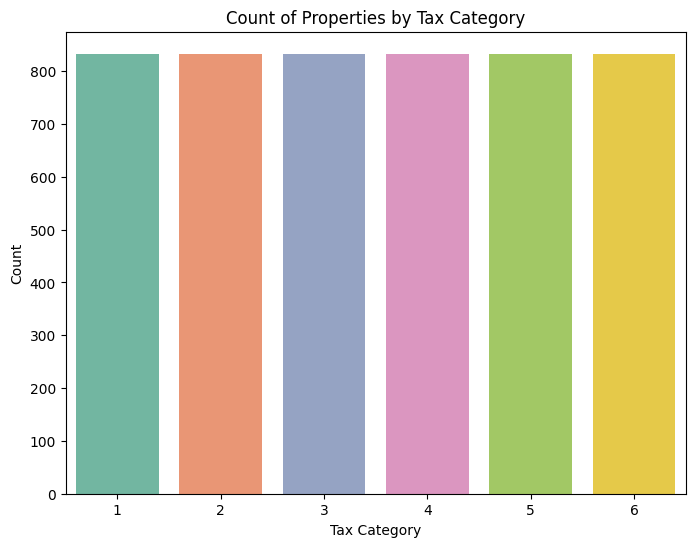

In [495]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(x='Tax_category', data=Tax_Assessment_data, palette='Set2')
plt.title('Count of Properties by Tax Category')
plt.xlabel('Tax Category')
plt.ylabel('Count')
plt.show()

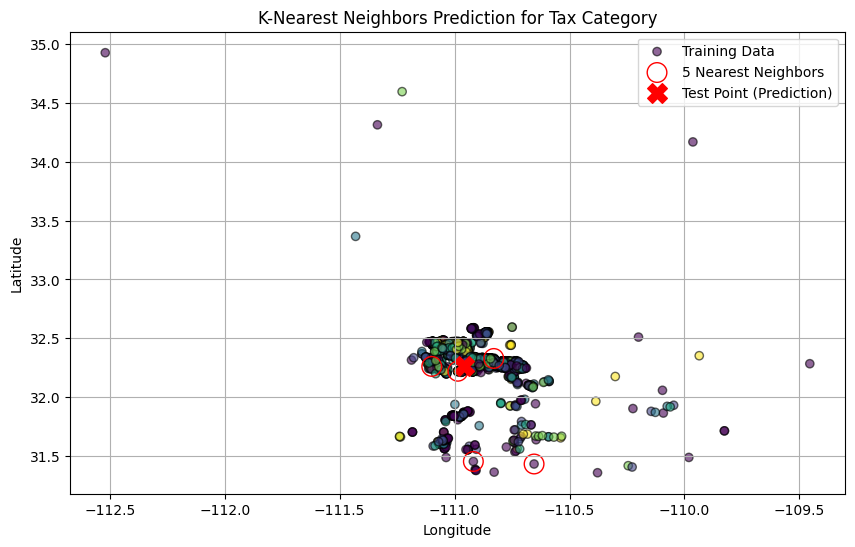

Please find the tax band:
Band1: 0-5000
Band2: 5000-10000
Band3: 10000 and above
-------------------------------------------------------------------------------------------------------------------------
Predicted Tax band is = 1


In [496]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_prediction(longitude, latitude, taxprice_per_sqft, X_train, y_train, K=5, epsilon=1e-3):
    x_test = np.array([longitude, latitude, taxprice_per_sqft])
    dist2 = np.sum((X_train - x_test)**2, axis=1)
    idxt = np.argsort(dist2)[:K]
    gamma_k = 1/(np.sqrt(dist2[idxt])+epsilon)
    y_hat = np.bincount(y_train.iloc[idxt], weights=gamma_k).argmax()

    plt.figure(figsize=(10, 6))

    if y_train.dtype.name == 'category':
        y_train = y_train.cat.codes

    plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, cmap='viridis', label='Training Data', alpha=0.6, edgecolor='k')

    plt.scatter(X_train.iloc[idxt, 0], X_train.iloc[idxt, 1], s=200, facecolors='none', edgecolors='r', label=f'{K} Nearest Neighbors')

    plt.scatter(longitude, latitude, color='red', s=200, marker='X', label='Test Point (Prediction)')

    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('K-Nearest Neighbors Prediction for Tax Category')
    plt.legend()
    plt.grid(True)
    plt.show()
    return y_hat

longitude= -110.95912278297625
latitude= 32.268051
sqft= 1173.0
Predicted_value=visualize_prediction(longitude, latitude, sqft, X_train, y_train, K=5, epsilon=1e-3)

print("Please find the tax band:")
print("Band1: 0-5000")
print("Band2: 5000-10000")
print("Band3: 10000 and above")
print("-------------------------------------------------------------------------------------------------------------------------")

print('Predicted Tax band is =',Predicted_value)

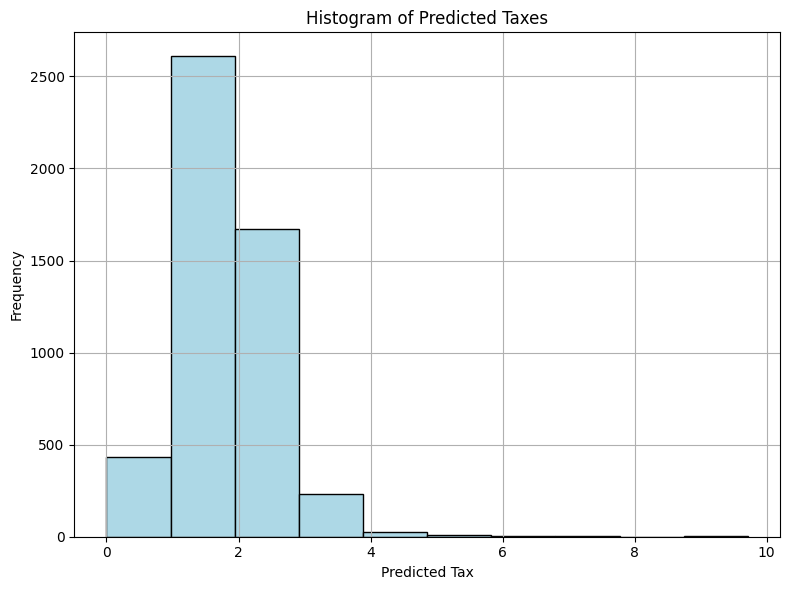

In [497]:
import matplotlib.pyplot as plt
predicted_tax = Tax_Assessment_data['taxprice_per_sqft']
plt.figure(figsize=(8, 6))
plt.hist(predicted_tax, bins=10, color='lightblue', edgecolor='black')

plt.title('Histogram of Predicted Taxes')
plt.xlabel('Predicted Tax')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()

plt.show()